In [1]:
import numpy as np
from ruptures_apart import apart
import matplotlib.pyplot as plt
pi = np.pi
np.random.seed(1234)

In [2]:
# create 1D angular signal
signal = np.concatenate([np.random.normal(m, 0.3, 5) for m in [0, 2, 4]])
signal = signal.reshape((-1, 1))

# shift the signal into [0, 2pi)
signal[signal < 0]    += 2*pi
signal[signal > 2*pi] -= 2*pi

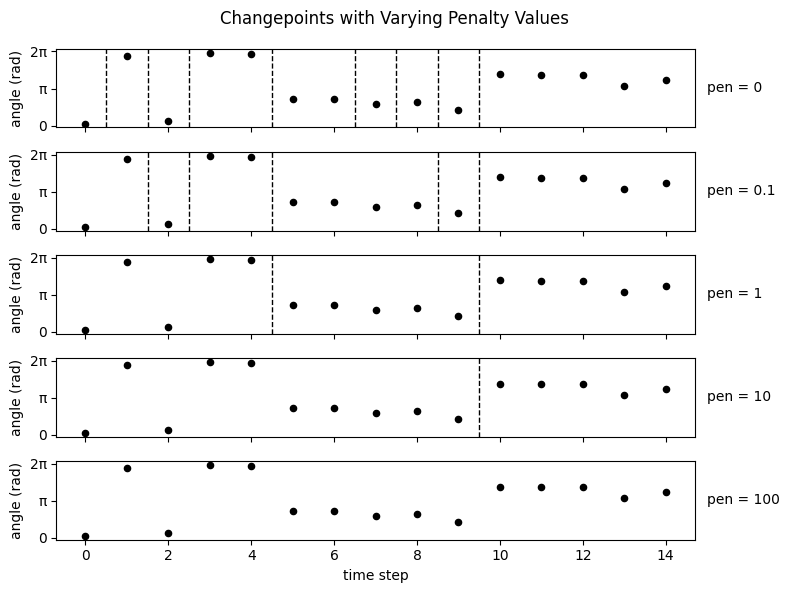

In [ ]:
penalties = [0, 0.1, 1, 10, 100]
fig, axs = plt.subplots(len(penalties), 1, figsize=(8, len(penalties)*1.2), sharex=True)
fig.suptitle("Changepoints with Varying Penalty Values")
for i, pen in enumerate(penalties):
    ax = axs[i]
    chpnts = apart(signal, pen, nStates=6)
    ax.scatter(range(len(signal)), signal, color='black', s=20)
    for cp in chpnts[:-1]:
        ax.axvline(cp - 0.5, color='black', linestyle='--', lw=1)
    ax.set_yticks([0, np.pi, 2*np.pi])
    ax.set_yticklabels(['0', 'π', '2π'])
    ax.set_ylabel('angle (rad)')
    ax.text(1.02, 0.5, f'pen = {pen}', transform=ax.transAxes, va='center', ha='left', fontsize=10)
    if i == len(penalties) - 1:
        ax.set_xlabel('time step')

plt.tight_layout()
plt.savefig("figs/penalty_analysis.png")
plt.show()